# Segerstolpe, Å. et al. Human Pancreatic Islets (SM2)

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")
from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
ad = sc.read("../write/Segerstolpe_reg.h5")

In [3]:
sc.pp.neighbors(ad,n_pcs=25)

In [4]:
sc.tl.louvain(ad, resolution=1.5, key_added = 'louvain_r1.5')
sc.tl.louvain(ad, resolution=2, key_added = 'louvain_r2')

sc.tl.louvain(ad, resolution=3, key_added = 'louvain_r3')

In [12]:
sc.tl.louvain(ad, resolution=0.3, key_added = 'louvain_r0.3')

In [14]:
sc.tl.louvain(ad, resolution=0.1, key_added = 'louvain_r0.1')

In [18]:
sc.tl.louvain(ad, resolution=1, key_added = 'louvain_r1')

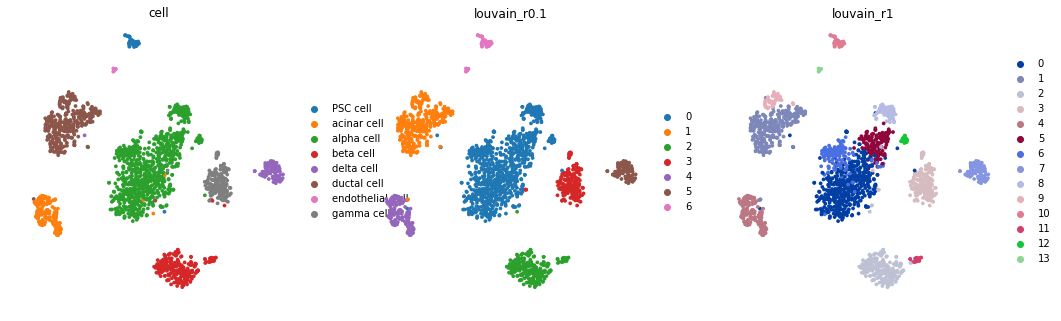

In [19]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','louvain_r0.1','louvain_r1'], frameon=False)

## SCCAF assessment
> use self-projection to test the global accuracy of a clustering (the human expert clustering). 
We find the discrimination between the human annotated cell types is very clear and the accuracy is up to 98%. It shows an almost-perfect clustering.

Mean CV accuracy: 0.9897
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9902


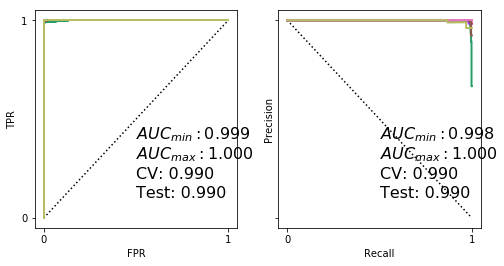

In [7]:
figsize(8,4)
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

## SCCAF recover
When the data annotation is unknown and we aim to identify the best clustering solution. 
We may start with a `over-clustering` and optimize the clustering by merging the clusters that cannot be discriminated by a machine learning model. 
(Here we use `logistic regression`, which uses a linear model, for the machine learning.) And we also constrain the optimization with a `under-clustering`.

In this example, we start with louvain clustering resolution 2.0 (`louvain_r2`).

We assign the optimization name (the `prefix` parameter) as `L1`, and the initial state of the optimization is named as `L1_Round0` kept in the `anndata.obs` slot.
Each Round of the optimization will increase the index, from `L1_Round1`, `L1_Round2` to `L1_Round10` ....

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9310
Accuracy on the training set: 0.9733
Accuracy on the hold-out set: 0.8933


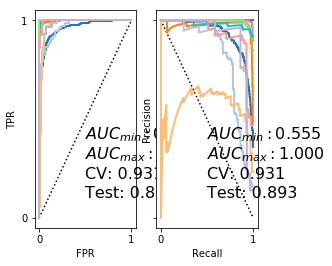

Accuracy on the training set: 0.9709
Accuracy on the hold-out set: 0.9026
Accuracy on the training set: 0.9745
Accuracy on the hold-out set: 0.8738
Accuracy on the training set: 0.9587
Accuracy on the hold-out set: 0.9182
Accuracy on the training set: 0.9782
Accuracy on the hold-out set: 0.8808
Max R1mat: 0.412698
Max R2mat: 0.027848
min_acc: 0.873832


<Figure size 288x288 with 0 Axes>

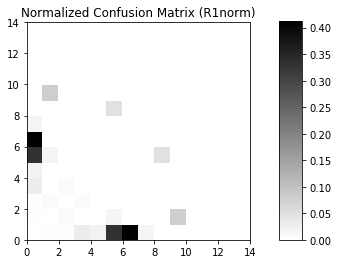

<Figure size 288x288 with 0 Axes>

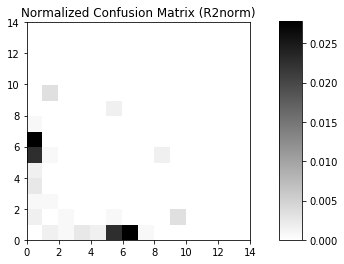

IGRAPH U-W- 14 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.412698
m2: 0.027848
Accuracy: 0.873832
R1norm_cutoff: 0.402698
R2norm_cutoff: 0.026848
Accuracy: 0.873832
Round1 ...
Mean CV accuracy: 0.9392
Accuracy on the training set: 0.9794
Accuracy on the hold-out set: 0.9050


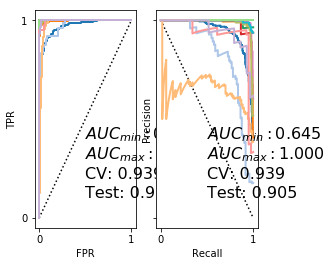

Accuracy on the training set: 0.9684
Accuracy on the hold-out set: 0.9058
Accuracy on the training set: 0.9672
Accuracy on the hold-out set: 0.8871
Accuracy on the training set: 0.9745
Accuracy on the hold-out set: 0.9026
Accuracy on the training set: 0.9624
Accuracy on the hold-out set: 0.9159
Max R1mat: 0.523810
Max R2mat: 0.033250
min_acc: 0.887072


<Figure size 288x288 with 0 Axes>

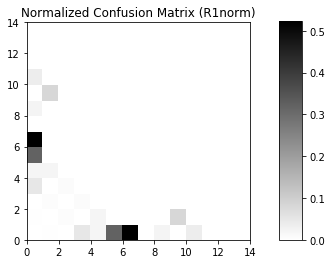

<Figure size 288x288 with 0 Axes>

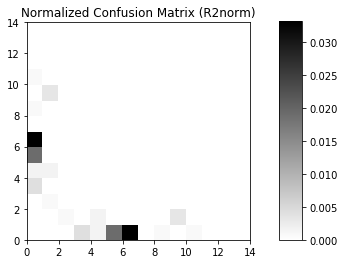

... storing 'L1_Round0_self-projection' as categorical
... storing 'L1_Round1' as categorical
... storing 'L1_Round4_self-projection' as categorical


IGRAPH U-W- 14 2 --
+ attr: weight (e)
+ edges:
0--6 0--6


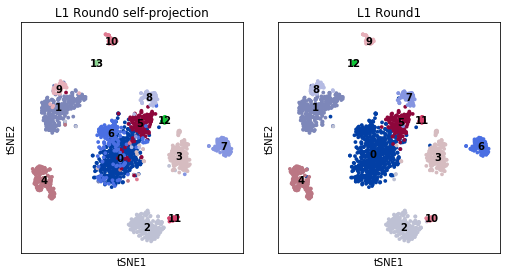

Round2 ...
Mean CV accuracy: 0.9272
Accuracy on the training set: 0.9775
Accuracy on the hold-out set: 0.9328


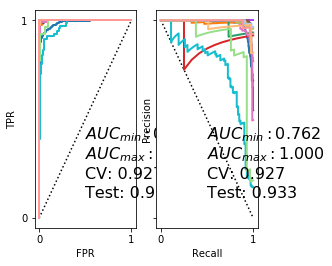

Accuracy on the training set: 0.9788
Accuracy on the hold-out set: 0.9328
Accuracy on the training set: 0.9841
Accuracy on the hold-out set: 0.9180
Accuracy on the training set: 0.9775
Accuracy on the hold-out set: 0.9343
Accuracy on the training set: 0.9828
Accuracy on the hold-out set: 0.9372
Max R1mat: 0.557377
Max R2mat: 0.030516
min_acc: 0.918021


<Figure size 288x288 with 0 Axes>

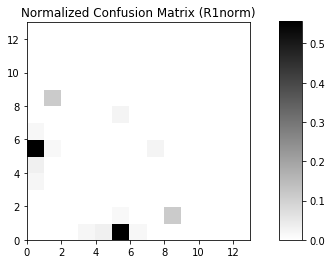

<Figure size 288x288 with 0 Axes>

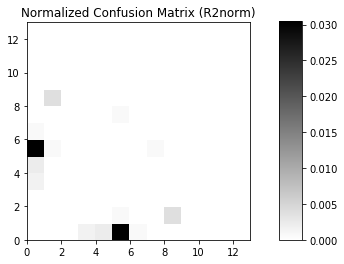

... storing 'L1_Round1_self-projection' as categorical
... storing 'L1_Round2' as categorical


IGRAPH U-W- 13 2 --
+ attr: weight (e)
+ edges:
0--5 0--5


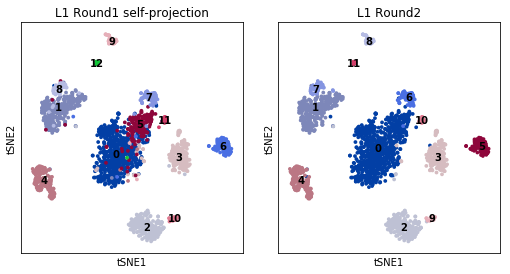

Round3 ...
Mean CV accuracy: 0.9573
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.9594


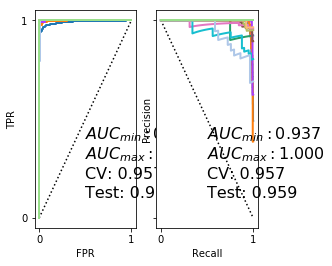

Accuracy on the training set: 0.9912
Accuracy on the hold-out set: 0.9517
Accuracy on the training set: 0.9897
Accuracy on the hold-out set: 0.9552
Accuracy on the training set: 0.9882
Accuracy on the hold-out set: 0.9601
Accuracy on the training set: 0.9882
Accuracy on the hold-out set: 0.9552
Max R1mat: 0.256410
Max R2mat: 0.008646
min_acc: 0.951681


<Figure size 288x288 with 0 Axes>

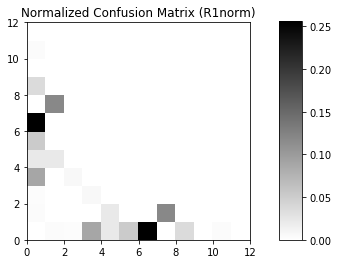

<Figure size 288x288 with 0 Axes>

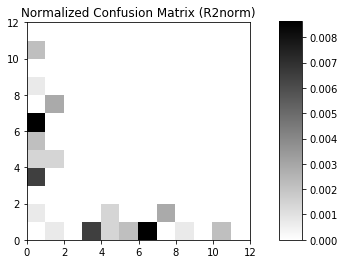

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.256410
m2: 0.008646
Accuracy: 0.951681
start_iter: 2
R1norm_cutoff: 0.246410
R2norm_cutoff: 0.007646
Accuracy: 0.951681
Round3 ...
Mean CV accuracy: 0.9690
Accuracy on the training set: 0.9926
Accuracy on the hold-out set: 0.9426


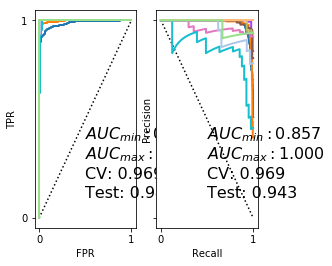

Accuracy on the training set: 0.9956
Accuracy on the hold-out set: 0.9580
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.9587
Accuracy on the training set: 0.9897
Accuracy on the hold-out set: 0.9636
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.9559
Max R1mat: 0.157895
Max R2mat: 0.005865
min_acc: 0.942577


<Figure size 288x288 with 0 Axes>

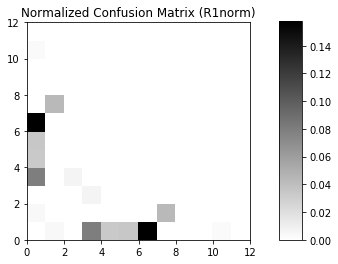

<Figure size 288x288 with 0 Axes>

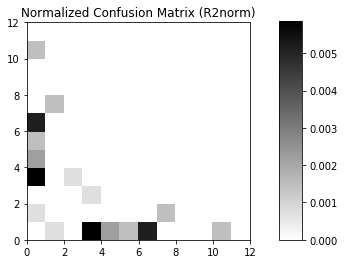

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.157895
m2: 0.005865
Accuracy: 0.942577
start_iter: 2
R1norm_cutoff: 0.147895
R2norm_cutoff: 0.004865
Accuracy: 0.942577
Round3 ...
Mean CV accuracy: 0.9470
Accuracy on the training set: 0.9838
Accuracy on the hold-out set: 0.9510


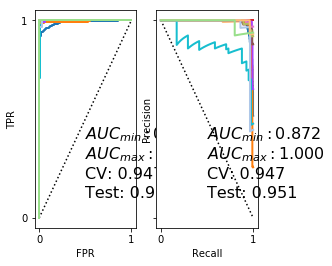

Accuracy on the training set: 0.9941
Accuracy on the hold-out set: 0.9531
Accuracy on the training set: 0.9941
Accuracy on the hold-out set: 0.9496
Accuracy on the training set: 0.9926
Accuracy on the hold-out set: 0.9531
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.9559
Max R1mat: 0.205128
Max R2mat: 0.005801
min_acc: 0.949580


<Figure size 288x288 with 0 Axes>

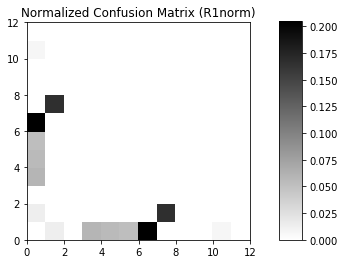

<Figure size 288x288 with 0 Axes>

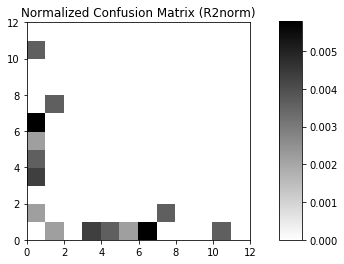

IGRAPH U-W- 12 4 --
+ attr: weight (e)
+ edges:
0--6 1--7 0--6 1--7


... storing 'L1_Round2_self-projection' as categorical
... storing 'L1_Round3' as categorical


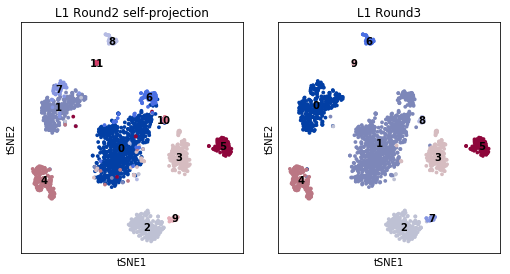

Round4 ...
Mean CV accuracy: 0.9836
Accuracy on the training set: 0.9984
Accuracy on the hold-out set: 0.9693


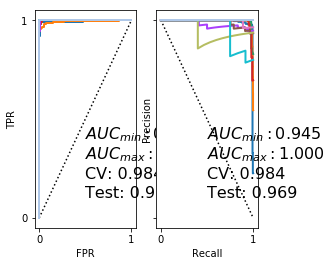

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9747
Accuracy on the training set: 0.9967
Accuracy on the hold-out set: 0.9687
Accuracy on the training set: 0.9934
Accuracy on the hold-out set: 0.9760
Accuracy on the training set: 0.9967
Accuracy on the hold-out set: 0.9733
Max R1mat: 0.111111
Max R2mat: 0.007473
min_acc: 0.968667


<Figure size 288x288 with 0 Axes>

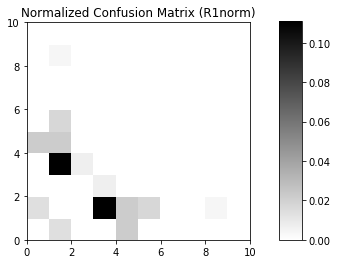

<Figure size 288x288 with 0 Axes>

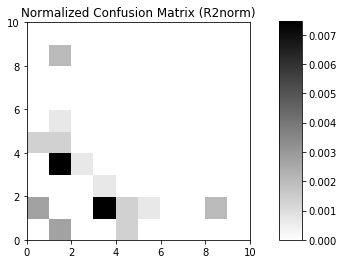

IGRAPH U-W- 10 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.111111
m2: 0.007473
Accuracy: 0.968667
start_iter: 3
R1norm_cutoff: 0.101111
R2norm_cutoff: 0.006473
Accuracy: 0.968667
Round4 ...
Mean CV accuracy: 0.9803
Accuracy on the training set: 0.9934
Accuracy on the hold-out set: 0.9733


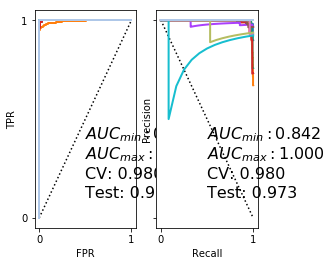

Accuracy on the training set: 0.9984
Accuracy on the hold-out set: 0.9673
Accuracy on the training set: 0.9934
Accuracy on the hold-out set: 0.9727
Accuracy on the training set: 0.9951
Accuracy on the hold-out set: 0.9640
Accuracy on the training set: 0.9951
Accuracy on the hold-out set: 0.9720
Max R1mat: 0.111111
Max R2mat: 0.006840
min_acc: 0.964000


<Figure size 288x288 with 0 Axes>

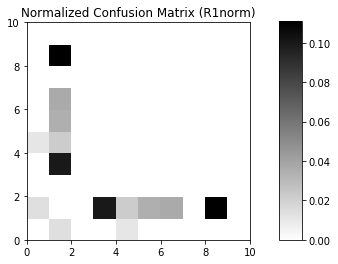

<Figure size 288x288 with 0 Axes>

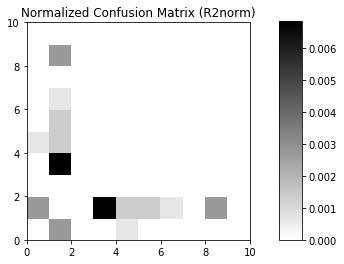

... storing 'L1_Round3_self-projection' as categorical
... storing 'L1_Round4' as categorical


IGRAPH U-W- 10 2 --
+ attr: weight (e)
+ edges:
1--8 1--8


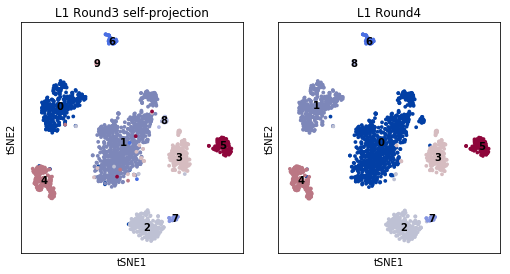

Round5 ...
Mean CV accuracy: 0.9917
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9888


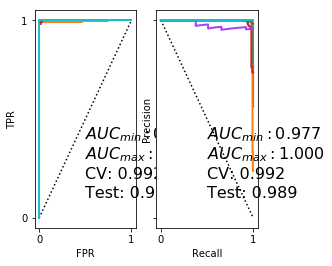

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9888
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9868
Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9874
Accuracy on the training set: 0.9983
Accuracy on the hold-out set: 0.9881
Max R1mat: 0.035088
Max R2mat: 0.002001
Converge SCCAF_optimize min_acc!
m1: 0.035088
m2: 0.002001
Accuracy: 0.986772
CPU times: user 36.4 s, sys: 905 ms, total: 37.4 s
Wall time: 14.2 s


In [21]:
%%time
figsize(4,4)
SCCAF_optimize_all(start='louvain_r1',low_res='louvain_r0.1',min_acc=0.975, ad=ad, use='pca', basis ='tsne', c_iter=5)

In [10]:
ad.write("../write/Segerstolpe_reg.h5")

... storing 'L1_Round4_self-projection' as categorical


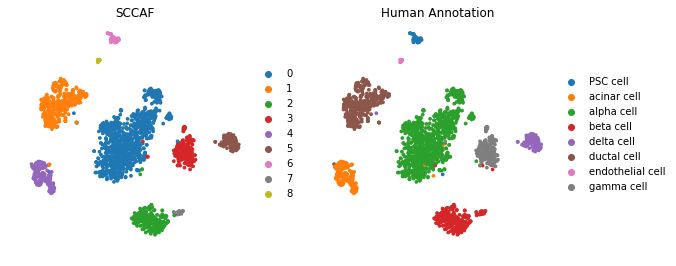

In [22]:
sc.pl.tsne(ad, color=['L1_result','cell',],frameon=False, title=['SCCAF','Human Annotation'])

# End